### Data pre-processing
The first step in every machine learning algorithm is to process the raw data in some meaningful representations. We will be using the [Bag-of-Words](https://towardsdatascience.com/a-simple-explanation-of-the-bag-of-words-model-b88fc4f4971) representation to process the text. It comprises of following steps:

- Process emails line-by-line to extract all the words.
- Replace extracted words by their stem (root) word. This is known as stemming and lematization.
- Remove stop words like and, or, is, am, and so on.
- Assign a unique index to each word. This forms the vocabulary.
- Represent each email as a binary vector of length equal to the size of the vocabulary such that the $i^{th}$ element of the vector is 1 iff the $i^th$ word is present in the email.

Here we provide you with the function signature along with the expected functionality. You are expected to complete them accordingly. 

# Assignment: Classification

Classification refers to categorizing the given data into classes. For example,
- Given an image of hand-written character, identifying the character (multi-class classification)
- Given an image, annotating it with all the objects present in the image (multi-label classification)
- Classifying an email as spam or non-spam (binary classification)
- Classifying a tumor as benign or malignant and so on

In this assignment, we will be building a classifier to classify emails as spam or non-spam. We will be using the Kaggle dataset [Spam or Not Spam Dataset](https://www.kaggle.com/datasets/ozlerhakan/spam-or-not-spam-dataset?resource=download) for this task. 

**Note**: You cannot load any libraries other than the mentioned ones.




In [17]:
import numpy as np
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
file_name='spam_or_not_spam.csv'
# takes an email as an argument
# read email line-by-line and extract all the words
# return list of extracted words
def read_email(email):
  words=email.split()
  return words
  
# takes a list of words as an argument
# replace each word by their stem word
# return list of stem words
def stemming(list_of_words):
  ps = PorterStemmer()
  stem_words = []
  for w in list_of_words:
    stem_words.append(ps.stem(w.lower()))
  return stem_words

# takes a list of stem-words as an argument
# remove stop words
# return list of stem words after removing stop words
def remove_stop_words(stem_words):
  s_words = set(stopwords.words('english'))
  stem_no_stop_words = []
  for w in stem_words:
    if w not in s_words:
      stem_no_stop_words.append(w)
  return stem_no_stop_words

# takes a list of stem-words as an argument
# add new words to the vocabulary and assign a unique index to them
# returns new vocabulary
def build_vocabulary(stem_no_stop_words,vocabulary):
  for w in stem_no_stop_words:
    if w not in vocabulary:
      vocabulary[w] = len(vocabulary)
  return vocabulary

# takes a list of stem-words and vocabulary as an argument
# returns bow representation
def get_bow(stem_no_stop_words,vocabulary):
  email_bow = np.zeros(len(vocabulary))
  for w in stem_no_stop_words:
    email_bow[vocabulary[w]] = 1
  return email_bow

# read the entire dataset
# convert emails to bow and maintain their labels
# call function text_to_bow()
def read_data(file_name):
  results = []
  with open(file_name, 'r') as f:
    count=0
    for line in f:
        if count==0:
            count=count+1
            continue
        words = line.split(',')
        results.append([words[0],int(words[1])])
  list_of_stem_words = []
  vocabulary={}
  for email in results:
    words=read_email(email[0])
    no_stop_words=remove_stop_words(words)
    stem_words=stemming(no_stop_words)
    list_of_stem_words.append(stem_words)
    vocabulary=build_vocabulary(stem_words,vocabulary)
  i=0
  data=[]
  for email in results:
    bow=get_bow(list_of_stem_words[i],vocabulary)
    data.append([bow,email[1]])
    i=i+1
  return data,vocabulary
data,vocabulary=read_data(file_name)

### Data Visualization
Let's understand the data distribution
- Visualize the frequency of word-occurence in all the emails(spam + non-spam)
- Visualize the frequency of word-occurence for spam and non-spam emails separately

Top 10 words in spam emails:
number
url
pleas
click
mail
list
remov
email
free
receiv
inform
Top 10 words in non-spam emails:
url
number
use
list
get
mail
date
wrote
one
like
time
Frequency of words in all emails:


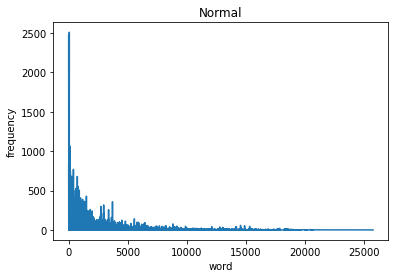

Frequency of words in spam emails:


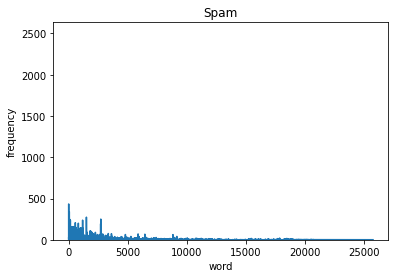

Frequency of words in non-spam emails:


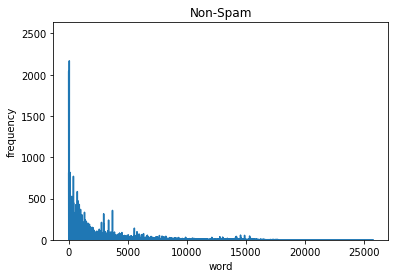

Frequency of top 50 words of non-spam emails in spam and non-spam:


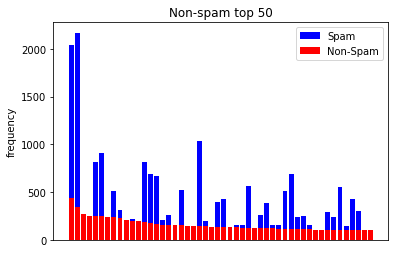

Frequency of top 50 words of spam emails in spam and non-spam:


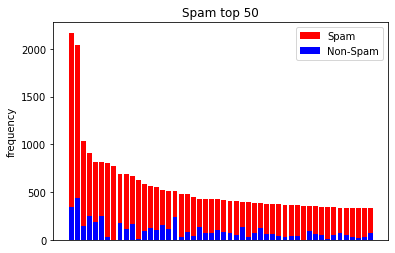

In [18]:
import matplotlib.pyplot as plt
# visuallze data distribution
def data_vis(data,vocabulary):
  freq_normal={}
  freq_spam={}
  freq_non_spam={}
  for i in range(0,len(data[0][0])):
    freq_normal[i]=0
    freq_spam[i]=0
    freq_non_spam[i]=0
  for email in data:
    i=0
    for word in email[0]:
      freq_normal[i]=freq_normal[i]+int(word)
      if email[1]==1:
        freq_spam[i]=freq_spam[i]+int(word)
      else:
        freq_non_spam[i]=freq_non_spam[i]+int(word)
      if freq_normal[i]!=freq_non_spam[i]+freq_spam[i]:
        print("error")
      i=i+1
  copy_spam={}
  for i in range(0,freq_spam.__len__()):
    copy_spam[list(vocabulary)[i]]=freq_spam[i]
  copy_non={}
  for i in range(0,freq_spam.__len__()):
    copy_non[list(vocabulary)[i]]=freq_non_spam[i]
  sort_orders_spam = sorted(copy_spam.items(), key=lambda x: x[1], reverse=True)
  sort_orders_non = sorted(copy_non.items(), key=lambda x: x[1], reverse=True)
  print("Top 10 words in spam emails:")
  for i in range(0,11):
    print(sort_orders_spam[i][0])
  print("Top 10 words in non-spam emails:")
  for i in range(0,11):
    print(sort_orders_non[i][0])

  # plot the frequency of each word
  values = [] 
  keys = []
  print("Frequency of words in all emails:")
  for key in freq_normal.keys():
    keys.append(key)
    values.append(freq_normal[key])
  plt.plot(keys, values)
  bottom,top=plt.ylim()
  plt.xlabel("word")
  plt.ylabel("frequency")
  plt.title("Normal")
  plt.show()

  # plot the frequency of each word in spam emails
  values = [] 
  keys = []
  print("Frequency of words in spam emails:")
  for key in freq_spam.keys():
    keys.append(key)
    values.append(freq_spam[key])
  plt.plot(keys, values)
  plt.ylim(0, top)
  plt.xlabel("word")
  plt.ylabel("frequency")
  plt.title("Spam")
  plt.show()

  # plot the frequency of each word in non-spam emails
  values = [] 
  keys = []
  print("Frequency of words in non-spam emails:")
  for key in freq_non_spam.keys():
    keys.append(key)
    values.append(freq_non_spam[key])
  plt.plot(keys, values)
  plt.ylim(0, top)
  plt.xlabel("word")
  plt.ylabel("frequency")
  plt.title("Non-Spam")
  plt.show()

  # plot the frequency of top 50 words in non spam emails for both spam and non spam
  print("Frequency of top 50 words of non-spam emails in spam and non-spam:")
  x1=[]
  y1=[]
  for i in range(0,50):
    x1.append(sort_orders_spam[i][0])
    y1.append(sort_orders_spam[i][1])
  x2=[]
  y2=[]
  for i in range(0,50):
    x2.append(sort_orders_spam[i][0])
    y2.append(copy_non[sort_orders_spam[i][0]])
  plt.bar(x2,y2,color='b')
  plt.bar(x1,y1,color='r')
  plt.legend(['Spam','Non-Spam'])
  frame1=plt.gca()
  frame1.axes.get_xaxis().set_visible(False)
  plt.xlabel("word")
  plt.ylabel("frequency")
  plt.title("Non-spam top 50")
  plt.show()

  # plot the frequency of top 50 words in spam emails for both spam and non spam
  print("Frequency of top 50 words of spam emails in spam and non-spam:")
  x1=[]
  y1=[]
  for i in range(0,50):
    x1.append(sort_orders_non[i][0])
    y1.append(sort_orders_non[i][1])
  x2=[]
  y2=[]
  for i in range(0,50):
    x2.append(sort_orders_non[i][0])
    y2.append(copy_spam[sort_orders_non[i][0]])
  plt.bar(x1,y1,color='r')
  plt.bar(x2,y2,color='b')
  frame1=plt.gca()
  frame1.axes.get_xaxis().set_visible(False)
  plt.xlabel("word")
  plt.ylabel("frequency")
  plt.legend(['Spam','Non-Spam',])
  plt.title("Spam top 50")
  plt.show()
data_vis(data,vocabulary)

### Learn a Classifier
Split the dataset randomly in the ratio 80:20 as the training and test dataset. Use only training dataset to learn the classifier. No test data should be used during training. Test data will only be used during evaluation.

Now let us try to use ML algorithms to classify emails as spam or non-spam. You are supposed to implement [SVM](https://scikit-learn.org/stable/modules/svm.html) and [K-Nearest Neighbour](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) algorithm available in scikit-learn using the same training dataset for both.

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

# split dataset
def split(data):
  np.random.shuffle(data)
  train_data=[]
  test_data=[]
  for i in range(0,len(data)):
    if i<0.8*len(data):
      train_data.append(data[i])
    else:
      test_data.append(data[i])
  return train_data, test_data

# learn a SVM model
# use the model to make prediction
# return the model predictions on train and test dataset
def svm_classifier(train_data,test_data):
  x = []
  y = []
  for email in train_data:
    x.append(email[0])
    y.append(email[1])
  x_test = []
  for email in test_data:
    x_test.append(email[0])
  clf = svm.SVC()
  clf.fit(x, y)
  svm_tra_predictions=clf.predict(x)
  svm_test_predictions=clf.predict(x_test)
  predict_labels=svm_tra_predictions,svm_test_predictions
  return predict_labels

# implement k-NN algorithm
# use the model to make prediction
# return the model predictions on train and test dataset
def knn_classifier(train_data,test_data):
  x = []
  y = []
  for email in train_data:
    x.append(email[0])
    y.append(email[1])
  x_test = []
  for email in test_data:
    x_test.append(email[0])
  clf = KNeighborsClassifier(n_neighbors=5)
  clf.fit(x, y)
  knn_tra_predictions=clf.predict(x)
  knn_test_predictions=clf.predict(x_test)
  predict_labels=knn_tra_predictions,knn_test_predictions
  return predict_labels

train_data, test_data = split(data)
svm_train_predictions, svm_test_predictions = svm_classifier(train_data, test_data)
knn_train_predictions, knn_test_predictions = knn_classifier(train_data, test_data)

### Model Evaluation
Compare the SVM and k-NN model using metrics
- Accuracy
- [AUC score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html)


In [20]:
from sklearn import metrics

# compute accuracy 
def compute_accuracy(true_labels, predicted_labels):
  correct = 0
  for i in range(0,len(true_labels)):
    if true_labels[i]==predicted_labels[i]:
      correct=correct+1
  acc=correct/len(true_labels)
  return acc

#compute AUC score 
def compute_auc(true_labels, predicted_labels):
  auc=metrics.roc_auc_score(true_labels, predicted_labels)
  return auc

true_label_test=[]
for email in test_data:
  true_label_test.append(email[1])
true_label_train=[]
for email in train_data:
  true_label_train.append(email[1])
print("SVM auc score on train data:",compute_auc(true_label_train, svm_train_predictions))
print("SVM auc score on test data:",compute_auc(true_label_test, svm_test_predictions))
print("KNN auc score on train data:",compute_auc(true_label_train, knn_train_predictions))
print("KNN auc score on test data:",compute_auc(true_label_test, knn_test_predictions))
print("SVM accuracy on train data:",compute_accuracy(true_label_train,svm_train_predictions))
print("SVM accuracy on test data:",compute_accuracy(true_label_test,svm_test_predictions))
print("KNN accuracy on train data:",compute_accuracy(true_label_train,knn_train_predictions))
print("KNN accuracy on test data:",compute_accuracy(true_label_test,knn_test_predictions))

SVM auc score on train data: 0.9783163265306123
SVM auc score on test data: 0.9444444444444444
KNN auc score on train data: 0.8955911049678836
KNN auc score on test data: 0.8301716350496838
SVM accuracy on train data: 0.9929166666666667
SVM accuracy on test data: 0.98
KNN accuracy on train data: 0.8716666666666667
KNN accuracy on test data: 0.7866666666666666
